<a href="https://colab.research.google.com/github/matthewpecsok/4482_fall_2022/blob/main/tutorials/Regression_and_regression_trees_insurance_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression and Regression Tree Tutorial
Adapted by Matthew Pecsok in June 2021 from Olivia Sheng's R tutorial (October 15, 2016)

1 Setup and Import Insurance dataset

2 Data exploration: some examples

3 Building a base explanatory model on the whole data set

4 Build a base predictive model and evaluate prediction performance

5 predict on the test data based on the trained base model

6 Use rminer to generate model’s evaluation metrics

7 Regression Trees and Model Trees

8 Evaluate rpart model

9 Generate prediction performance metrics using rminer package

10 Model tree - M5P (RWeka)

11 M5P : prediction and metric evaluation

12 Improve lm model performance by interaction and quadratic terms

13 Create an improved explanatory model using both interaction and quadratic terms on the train data set

14 Generate prediction and evaluation metrics from the improved trained lm model

15 cross validation (cv) for numeric predictions

16 cross validation using lapply and anonymous function

17 Display cv performances results in a table using kable() in knitr package

18 cross validation using a named function

19 3-fold and 10 fold cross validations of lm using cv_function

20 3-fold and 10 fold cross validations of rpart using cv_function

21 3-fold and 10 fold cross validations of M5P using cv_function

# 1 Setup and Import Insurance dataset

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import statsmodels.api as sm
from scipy import stats
#from sklearn.metrics import 
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics


In [73]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# load the data

In [74]:
insurance = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/6482_to_4482/insurance.csv")

show column info

In [75]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


show column statistics

In [76]:
# include all makes sure to include categorical columns and makes it similar to summary in r
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


# 2 Data exploration: some examples

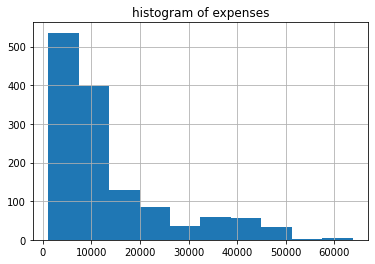

In [77]:
# histogram of insurance expenses
insurance.expenses.hist()
plt.title("histogram of expenses")
plt.show()

In [78]:
# correlations
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


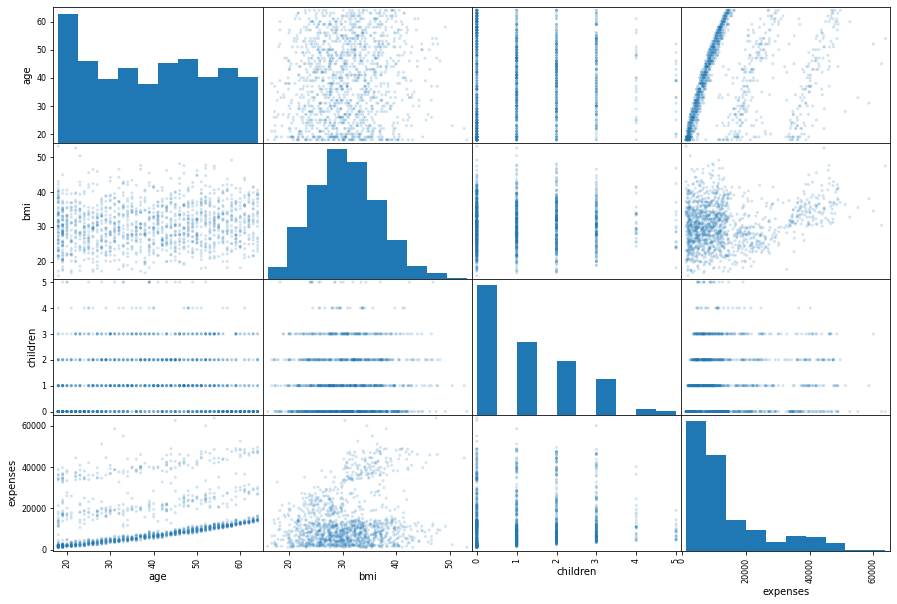

In [79]:
# visualizing correlations
pd.plotting.scatter_matrix(insurance,figsize=(15, 10),alpha=0.2)
plt.show()

# 3 Building a base explanatory model on the whole data set

In [80]:
# import the package (generally done above in a libraries section, demonstrated here for informational purposes)
from sklearn.linear_model import LinearRegression

dataset before dummy encoding

In [81]:
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [82]:
#dataset after dummy encoding

In [83]:
# dummy encode the dataframe
X = pd.get_dummies(insurance)
X

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


In [84]:
# remove the target variable from our X dataset and put it into a new variable, all in one command
y_true = X.pop('expenses')

In [85]:
# our target is a pandas series object
type(y_true)

pandas.core.series.Series

In [86]:
# fit the model 
# no random state as there is no randomness to this classifier
# results are reproducible 

reg = LinearRegression().fit(X,y_true)

In [87]:
# score gives us R^2
reg.score(X, y_true)

0.7509284662058436

In [88]:
# coef represents the change in units of the target for every unit in the predictor 
reg.coef_

array([   256.83917062,    339.28986331,    475.68891551,     65.67600705,
          -65.67600705, -11923.73834752,  11923.73834752,    586.92290648,
          234.13281096,   -448.67279452,   -372.38292292])

In [89]:
# make a nice dataframe so we can see the 
# predictors with their coefficients
pd.DataFrame({'column':X.columns,'coef':reg.coef_})

,column,coef
0,age,256.839171
1,bmi,339.289863
2,children,475.688916
3,sex_female,65.676007
4,sex_male,-65.676007
5,smoker_no,-11923.738348
6,smoker_yes,11923.738348
7,region_northeast,586.922906
8,region_northwest,234.132811
9,region_southeast,-448.672795


In [90]:
# show the intercept 
reg.intercept_

-670.42302686943

In [91]:
#predict on the X data
y_pred = reg.predict(X)

# model metrics

In [92]:
# MEAN ABSOLUTE ERROR 
sklearn.metrics.mean_absolute_error(y_true, y_pred)

4170.730986790802

In [93]:
# MEAN SQUARED ERROR
sklearn.metrics.mean_squared_error(y_true, y_pred)

36499631.63514606

In [94]:
# R SQUARED
sklearn.metrics.r2_score(y_true, y_pred)

0.7509284662058436

# 4 Build a base predictive model and evaluate prediction performance

In [95]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
kf.get_n_splits(X)

3

In [96]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_true, 
                                                    test_size=.5, 
                                                    random_state=42)

In [97]:
reg = LinearRegression().fit(X_train,y_train)

# 5 predict on the test data based on the trained base model

In [98]:
y_test_pred = reg.predict(X_test)

In [99]:
import numpy as np

pd.Series(y_test_pred).describe()
# y_test_pred

count      669.000000
mean     13719.351102
std      10547.279061
min      -1175.344183
25%       6340.422626
50%      10323.799132
75%      16094.836225
max      40420.619123
dtype: float64

In [100]:
type(y_test_pred)

numpy.ndarray

In [101]:
type(y_test)

pandas.core.series.Series

In [102]:
pd.Series(y_train)

501      6837.37
1237    12224.35
539     27346.04
177     10436.10
1291    34828.65
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 669, dtype: float64

In [103]:
y_test.corr(pd.Series(y_test_pred))

0.05106787124189412

In [104]:
y_test_pred.shape

(669,)

In [105]:
pd.Series(y_test_pred).describe()

count      669.000000
mean     13719.351102
std      10547.279061
min      -1175.344183
25%       6340.422626
50%      10323.799132
75%      16094.836225
max      40420.619123
dtype: float64

In [106]:
y_test.reset_index().expenses.describe()

count      669.000000
mean     13647.359357
std      12508.026038
min       1121.870000
25%       4718.200000
50%       9487.640000
75%      17626.240000
max      63770.430000
Name: expenses, dtype: float64

In [107]:
# compare the correlation between actual and predicted expenses in test data

y_test = y_test.reset_index(drop=True)
y_test.corr(pd.Series(y_test_pred))

0.8806958389543877

# 6 Generate model’s evaluation metrics

### MAE

In [108]:
sklearn.metrics.mean_absolute_error(y_test, y_test_pred)

4281.96467190955

### MSE

In [109]:
sklearn.metrics.mean_squared_error(y_test, y_test_pred)

35275467.563591346

### R2

In [110]:
sklearn.metrics.r2_score(y_test, y_test_pred)

0.7741891108318595

# 7 regression tree

In [111]:
# Regression tree
reg_tree = DecisionTreeRegressor(random_state=0,max_depth=3)

In [112]:
reg_tree = reg_tree.fit(X,y_true)


In [113]:
from sklearn import tree
print(tree.export_text(reg_tree,feature_names=X.columns.to_list()))

|--- smoker_yes <= 0.50
|   |--- age <= 42.50
|   |   |--- children <= 0.50
|   |   |   |--- value: [3850.84]
|   |   |--- children >  0.50
|   |   |   |--- value: [6540.68]
|   |--- age >  42.50
|   |   |--- age <= 51.50
|   |   |   |--- value: [10193.10]
|   |   |--- age >  51.50
|   |   |   |--- value: [13858.44]
|--- smoker_yes >  0.50
|   |--- bmi <= 30.10
|   |   |--- age <= 41.00
|   |   |   |--- value: [18674.47]
|   |   |--- age >  41.00
|   |   |   |--- value: [25077.11]
|   |--- bmi >  30.10
|   |   |--- age <= 41.50
|   |   |   |--- value: [38419.84]
|   |   |--- age >  41.50
|   |   |   |--- value: [45638.33]



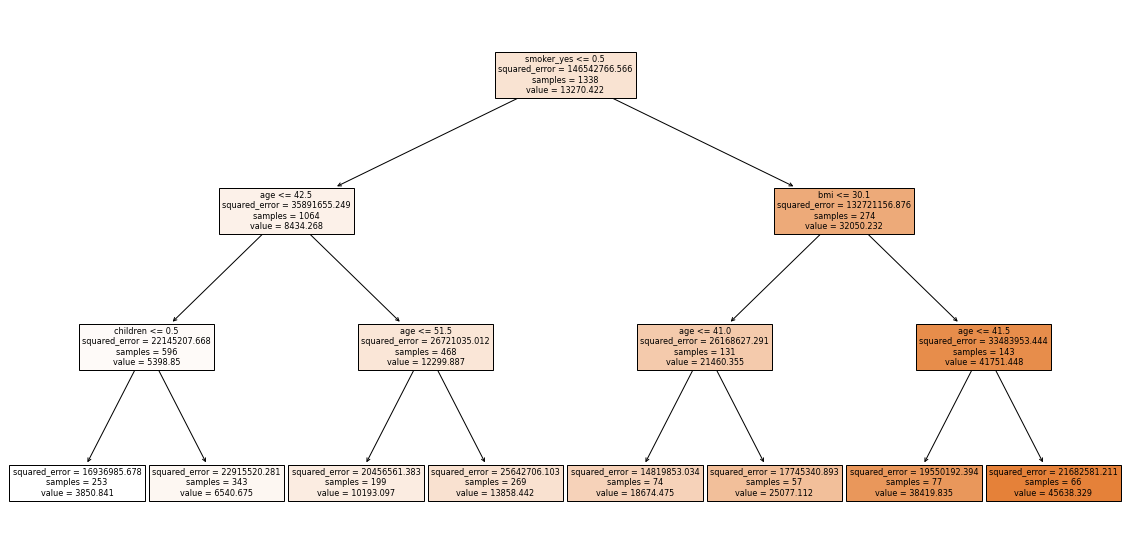

In [114]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(reg_tree,
                   feature_names=X.columns.to_list(), # make sure the feature names are in output
                   filled=True) # filled true color codes by the class. 

# 8 Evaluate regression tree model

In [115]:
# predict using our model 
y_pred = reg_tree.predict(X)

display regression metric results

In [116]:
print("MAE:",sklearn.metrics.mean_absolute_error(y_true, y_pred))
print("MSE:",sklearn.metrics.mean_squared_error(y_true, y_pred))
print("MAPE:",sklearn.metrics.mean_absolute_percentage_error(y_true, y_pred))
print("R2:",sklearn.metrics.r2_score(y_true, y_pred))


MAE: 2776.806104694089
MSE: 21045136.93519391
MAPE: 0.3686686905297417
R2: 0.8563891113271006


# 9 Improve lm model performance by interaction and quadratic terms

In [46]:
insurance['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [47]:
# add a higher-order "age" term
insurance['age2'] = insurance['age']**2
insurance['age2']

0        361
1        324
2        784
3       1089
4       1024
        ... 
1333    2500
1334     324
1335     324
1336     441
1337    3721
Name: age2, Length: 1338, dtype: int64

In [48]:
insurance['bmi30'] = 1*(insurance['bmi'] >= 30)

In [49]:
insurance['bmi30']

0       0
1       1
2       1
3       0
4       0
       ..
1333    1
1334    1
1335    1
1336    0
1337    0
Name: bmi30, Length: 1338, dtype: int64

In [50]:
(insurance['smoker'] == "yes")*1

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [51]:
insurance['bmi']*(insurance['smoker'] == "yes")*1

0       27.9
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1333     0.0
1334     0.0
1335     0.0
1336     0.0
1337    29.1
Length: 1338, dtype: float64

In [52]:
import patsy

In [53]:
insurance

,age,sex,bmi,children,smoker,region,expenses,age2,bmi30
0,19,female,27.9,0,yes,southwest,16884.92,361,0
1,18,male,33.8,1,no,southeast,1725.55,324,1
2,28,male,33.0,3,no,southeast,4449.46,784,1
3,33,male,22.7,0,no,northwest,21984.47,1089,0
4,32,male,28.9,0,no,northwest,3866.86,1024,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,2500,1
1334,18,female,31.9,0,no,northeast,2205.98,324,1
1335,18,female,36.9,0,no,southeast,1629.83,324,1
1336,21,female,25.8,0,no,southwest,2007.95,441,0


In [54]:
train_insurance,test_insurance = train_test_split(insurance,train_size=.7,random_state=42)

In [55]:
print(train_insurance.shape)
print(test_insurance.shape)

(936, 9)
(402, 9)


# use the patsy package to make creating an interaction term and specifying predictors a bit easier

In [56]:
y_train, X_train = patsy.dmatrices('expenses ~ '+"+ age2 + age+bmi+children+region+sex+bmi30*smoker", train_insurance)
y_test, X_test = patsy.dmatrices('expenses ~ '+"+ age2 + age+bmi+children+region+sex+bmi30*smoker", test_insurance)


In [57]:
type(y_train) # this needs to be converted back to a numpy array before we use it.

patsy.design_info.DesignMatrix

In [58]:
# convert back to numpy array

y_train = np.asarray(y_train)
X_train = np.asarray(X_train)
y_test = np.asarray(y_test)
X_test = np.asarray(X_test)


# fit the model that includes the interaction term

In [59]:
reg = LinearRegression().fit(X_train,y_train)

In [60]:
reg # show model arguments

LinearRegression()

predict

In [61]:
y_pred = reg.predict(X_test)

show regression metrics

In [62]:
print("MAE:",sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",sklearn.metrics.mean_squared_error(y_test, y_pred))
print("R2:",sklearn.metrics.r2_score(y_test, y_pred))


MAE: 2358.4523807737164
MSE: 18380771.73935779
R2: 0.8746403521803192


# cross validation using a named function

In [63]:
def create_folds_predict(df, target_column, kFolds, seedVal, classification_model, metrics_list, target_names):

  df = pd.get_dummies(df)
  kf = KFold(n_splits=kFolds,shuffle=True)
  fold = 1

  metrics_list = []

  for train_index, test_index in kf.split(df):

    X_train = df.loc[train_index].drop(target_column,axis=1)
    y_train = df.loc[train_index][target_column]

    X_test = df.loc[test_index].drop(target_column,axis=1)
    y_test = df.loc[test_index][target_column]
    clf = classification_model.fit(X_train,y_train)

    y_pred_test = clf.predict(X_test)

    #confusion_matrix(y_test,y_pred_test)
    #disp = ConfusionMatrixDisplay(
    #    confusion_matrix=confusion_matrix(y_test,y_pred_test),
    #    display_labels=target_names
    #    )
    #disp.plot(values_format='',cmap=plt.cm.Blues)
    #plt.show()

    #display(sklearn.metrics.mean_absolute_error(y_test, y_pred))
    #display(sklearn.metrics.mean_squared_error(y_test, y_pred))
    #display(sklearn.metrics.r2_score(y_test, y_pred))

    metrics_df = pd.DataFrame({
        'mae':sklearn.metrics.mean_absolute_error(y_test, y_pred_test),
        'mse':sklearn.metrics.mean_squared_error(y_test, y_pred_test),
        'r2':sklearn.metrics.r2_score(y_test, y_pred_test),

        },index=[0])
    #metrics_df_orig = metrics_df
    metrics_df['fold'] = fold
    fold += 1

    metrics_list.append(metrics_df)
    metrics_df = pd.concat(metrics_list)
    #metrics_df = metrics_df.reset_index().rename({'index':'metric'},axis=1)
    #metrics_df = metrics_df.drop(['macro avg','weighted avg'],axis=1)

    #metrics_df = metrics_df.sort_values('metric')
    #metrics_std_df = metrics_df.groupby('metric').agg(['std']).drop('fold',axis=1)

    #metrics_mean_df = metrics_df.groupby('metric').agg(['mean']).drop('fold',axis=1)

    metrics_mean = metrics_df.mean(numeric_only=True)
    metrics_mean['fold'] = 'mean'

    metrics_std = metrics_df.std(numeric_only=True)
    metrics_std['fold'] = 'std'


    metrics_df = metrics_df.append(metrics_mean, ignore_index=True)
    metrics_df = metrics_df.append(metrics_std, ignore_index=True)


  display(metrics_df)
  #display(metrics_mean_df)
  #display(metrics_std_df)
  

    

  #return([metrics_df,metrics_mean_df,metrics_std_df,metrics_df_orig])

In [64]:
create_folds_predict(df=insurance,\
                               target_column='expenses',\
                               kFolds=3,\
                               seedVal=0,\
                               classification_model=LinearRegression(),\
                               metrics_list="",\
                               target_names=["0","1"]\
                               )

,mae,mse,r2,fold
0,4421.826580,4.096761e+07,0.728027,1
1,4320.915031,3.704931e+07,0.749805,2
2,3941.038801,2.949535e+07,0.790476,3
3,4227.926804,3.583742e+07,0.756103,mean
4,253.523825,5.831351e+06,0.031697,std


In [65]:
create_folds_predict(df=insurance,\
                               target_column='expenses',\
                               kFolds=10,\
                               seedVal=0,\
                               classification_model=LinearRegression(),\
                               metrics_list="",\
                               target_names=["0","1"]\
                               )

,mae,mse,r2,fold
0,4307.578042,3.714854e+07,0.767090,1
1,3595.463658,2.375362e+07,0.806036,2
2,4005.437509,3.130312e+07,0.779836,3
3,4337.828856,3.762758e+07,0.776568,4
4,3991.376050,2.810465e+07,0.804004,5
5,4241.181288,3.688217e+07,0.759117,6
6,4663.997074,4.422079e+07,0.735512,7
7,3789.505939,2.645211e+07,0.788580,8
8,4777.029607,4.767592e+07,0.664792,9
9,4737.566075,4.822785e+07,0.641186,10


In [66]:
create_folds_predict(df=insurance,\
                               target_column='expenses',\
                               kFolds=3,\
                               seedVal=0,\
                               classification_model=DecisionTreeRegressor(random_state=0,max_depth=3),\
                               metrics_list="",\
                               target_names=["0","1"]\
                               )

,mae,mse,r2,fold
0,2631.414732,1.796919e+07,0.881803,1
1,2706.838100,2.126142e+07,0.858193,2
2,3160.668413,2.806697e+07,0.796090,3
3,2832.973748,2.243253e+07,0.845362,mean
4,286.286597,5.149749e+06,0.044274,std


In [67]:
create_folds_predict(df=insurance,\
                               target_column='expenses',\
                               kFolds=10,\
                               seedVal=0,\
                               classification_model=DecisionTreeRegressor(random_state=0,max_depth=3),\
                               metrics_list="",\
                               target_names=["0","1"]\
                               )

,mae,mse,r2,fold
0,2508.175585,1.987200e+07,0.882034,1
1,3061.797835,2.786567e+07,0.788688,2
2,3127.922276,2.977452e+07,0.757063,3
3,2766.052569,1.935670e+07,0.866930,4
4,2984.173994,2.478111e+07,0.833199,5
5,2628.601597,1.467010e+07,0.886428,6
6,2823.817440,2.261841e+07,0.892165,7
7,2740.137369,1.866702e+07,0.877285,8
8,3382.933215,3.207525e+07,0.774251,9
9,2478.681225,1.576290e+07,0.857386,10


In [68]:
# thank you for reading this notebook!

In [69]:
!cp "/content/drive/My Drive/Colab Notebooks/6482_to_4482/Regression-and-regression-trees-insurance-tutorial.ipynb" ./

# run the second shell command, jupyter nbconvert --to html "file name of the notebook"
# create html from ipynb

!jupyter nbconvert --to html "Regression-and-regression-trees-insurance-tutorial.ipynb"

[NbConvertApp] Converting notebook Regression-and-regression-trees-insurance-tutorial.ipynb to html
[NbConvertApp] Writing 340626 bytes to Regression-and-regression-trees-insurance-tutorial.html


In [70]:
target_y = car_mpg.pop('mpg')

NameError: ignored

In [ ]:
car_mpg_enc = pd.get_dummies(car_mpg,drop_first=True)

In [ ]:
from statsmodels.api import OLS
OLS(target_y,car_mpg_enc).fit().summary()